# Modelos tridimensionales y superiores

Para terminar, veremos algunos ejemplos de modelos que están planteados mediante campos vectoriales $F:\mathbb{R}^n\to\mathbb{R}^n$ con $n\geqslant3$. En general es difícil analizar estos modelos geométricamente, así que haremos algunas observaciones generales sobre su implementación y predicción.

<a id='intro'></a>
## Contenido

- [Introducción](#intro)
- [Modelos lineales tridimensionales](#3d)
- [Modelo de sodio transitorio](#inat)
- [Modelado basado en conductancias](#conduc)
- [Modelo reducido de Hodgkin-Huxley](#reduc)
- [El modelo de Hodgkin-Huxley](#hh)
- [Modelo de generación de ráfagas](#plant)

In [1]:
# Cargamos la paquetería

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace
from numpy import meshgrid
from numpy.linalg import norm
from numpy.linalg import norm, eig

from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.optimize import fsolve
from numpy import sqrt, exp, sin, cos, pi

<a id='3d'></a>
## Modelos lineales tridimensionales

Como antes, el caso más sencillo a estudiar son los modelos lineales de la forma $\dot{u}=Au$, con $u=(x,y,z)$ y $A\in\mathbb{R}^{3\times 3}$. Un ejemplo de lo anterior sería

$$\begin{align*}
\dot{x}&=-0.5x-0.5y,\\
\dot{y}&=0.5x-0.5y,\\
\dot{z}&=-0.001z,
\end{align*}$$

con matriz asociada

$$A=\left(\begin{array}{ccc}
-0.5 & -0.5 & 0 \\
0.5 & -0.5 & 0.0 \\
0.0 & 0.0 & -0.001
\end{array}\right).$$

La resolución numérica es análoga a los modelos en dimensiones 1 y 2. Podemos graficar cualquiera de las tres trazas temporales para darnos una idea de la evolución del sistema.

In [ ]:
%matplotlib ipympl

def lin3(x,y,z):
    dx = -0.5*x-0.5*y
    dy = 0.5*x-0.5*y
    dz = -0.1*z
    return [dx,dy,dz]

def lin3_int(u,t):
    x, y, z = u
    return lin3(x,y,z)

x0 = 1.0
y0 = 0.0
z0 = 1.0
u0 = [x0,y0,z0]

x1 = -1.0
y1 = 0.0
z1 = 1.0
u1 = [x1,y1,z1]

x2 = 0.0
y2 = 1.0
z2 = 1.0
u2 = [x2,y2,z2]

x3 = 0.0
y3 = -1.0
z3 = 1.0
u3 = [x3,y3,z3]

x0 = 1.0
y0 = 0.0
z0 = 1.0
u0 = [x0,y0,z0]

x4 = -1.0
y4 = 1.0
z4 = 1.0
u4 = [x4,y4,z4]

x5 = 1.0
y5 = 1.0
z5 = 1.0
u5 = [x5,y5,z5]

x6 = -1.0
y6 = -1.0
z6 = 1.0
u6 = [x6,y6,z6]

x7 = 1.0
y7 = -1.0
z7 = 1.0
u7 = [x7,y7,z7]

t = linspace(0,10,1001)
I_quiver = linspace(0,int(0.65*len(t)),15)
U0 = odeint(lin3_int,u0,t)
X0 = U0[:,0]
Y0 = U0[:,1]
Z0 = U0[:,2]

U1 = odeint(lin3_int,u1,t)
X1 = U1[:,0]
Y1 = U1[:,1]
Z1 = U1[:,2]

U2= odeint(lin3_int,u2,t)
X2 = U2[:,0]
Y2 = U2[:,1]
Z2 = U2[:,2]

U3 = odeint(lin3_int,u3,t)
X3 = U3[:,0]
Y3 = U3[:,1]
Z3 = U3[:,2]

U4 = odeint(lin3_int,u4,t)
X4 = U4[:,0]
Y4 = U4[:,1]
Z4 = U4[:,2]

U5 = odeint(lin3_int,u5,t)
X5 = U5[:,0]
Y5 = U5[:,1]
Z5 = U5[:,2]

U7= odeint(lin3_int,u7,t)
X7 = U7[:,0]
Y7 = U7[:,1]
Z7 = U7[:,2]

U6 = odeint(lin3_int,u6,t)
X6 = U6[:,0]
Y6 = U6[:,1]
Z6 = U6[:,2]

p = plt.figure(figsize=(12,7))
p = plt.plot(t,X6,label='x(t)')
p = plt.plot(t,Y6,label='y(t)')
p = plt.plot(t,Z6,label='z(t)')
p = plt.title('Traza temporal lin3')
p = plt.xlabel('t')
p = plt.ylabel('x,y,z')
p = plt.legend()

Las soluciones completas ahora se grafican en un *espacio de fases*. Esto requiere abrir un entorno tridimensional dentro de matplotlib.

In [ ]:
%matplotlib ipympl
# %matplotlib notebook
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(X0, Y0, Z0, color = 'blue')
ax.plot(X1, Y1, Z1, color = 'blue')
ax.plot(X2, Y2, Z2, color = 'blue')
ax.plot(X3, Y3, Z3, color = 'blue')
ax.plot(X4, Y4, Z0, color = 'blue')
ax.plot(X1, Y1, Z1, color = 'blue')
ax.plot(X2, Y2, Z2, color = 'blue')
ax.plot(X3, Y3, Z3, color = 'blue')

for k in range(len(I_quiver)-1):
    i = int(I_quiver[k])
    X0t = X0[i]
    Y0t = Y0[i]
    Z0t = Z0[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.05, normalize=True, color = 'darkblue', arrow_length_ratio = 0.3, linewidth = 2.0)
    X0t = X1[i]
    Y0t = Y1[i]
    Z0t = Z1[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.05, normalize=True, color = 'darkblue', arrow_length_ratio = 0.3, linewidth = 2.0)
    X0t = X2[i]
    Y0t = Y2[i]
    Z0t = Z2[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.05, normalize=True, color = 'darkblue', arrow_length_ratio = 0.3, linewidth = 2.0)
    X0t = X3[i]
    Y0t = Y3[i]
    Z0t = Z3[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.05, normalize=True, color = 'darkblue', arrow_length_ratio = 0.3, linewidth = 2.0)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Espacio de fases lin3')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(0.0,1.0)

La clasificación de equilibrios tridimensionales sigue el mismo procedimiento, grosso modo, del caso bidimensional. Tenemos que empezar por calcular la matriz jacobiana, que en este caso está dada por

$$J=\left(\begin{array}{ccc}
\dfrac{\partial F_1}{\partial x} & \dfrac{\partial F_1}{\partial y} & \dfrac{\partial F_1}{\partial z}\\
\dfrac{\partial F_2}{\partial x} & \dfrac{\partial F_2}{\partial y} & \dfrac{\partial F_2}{\partial z}\\
\dfrac{\partial F_3}{\partial x} & \dfrac{\partial F_3}{\partial y} & \dfrac{\partial F_3}{\partial z} 
\end{array}\right).$$

La diferencia principal radica en el número posible de combinaciones que surgen de la dinámica sobre cada eje, o análogamente, de los eigenvalores que puede tener la jacobiana. Para $n=3$ dimensiones o superiores, únicamente clasificamos a los equilibrios en función de su estabilidad, que puede corresponder a uno de los siguientes tres casos:

- El equilibrio $u_0$ es *inestable* si al menos una solución cercana tiende a alejarse.
- El equilibrio $u_0$ es *Lyapunov-estable* si toda solución cercana se mantiene cerca (quizás sin converger).
- El equilibrio $u_0$ es *asintóticamente estable* si toda solución cercana converge al equilibrio.

Usaremos un criterio de clasificación similar, pero claramente distinto, al caso bidimensional.

### Teorema de Grobman-Hartman (simplificado, n=3)

Sea $\dot{x}=f(x)$ con $f:\mathbb{R}^3\to\mathbb{R}^3$ un campo tridimensional, $x_0$ un punto de equilibrio, y $J=J_f(x_0)$ la jacobiana del sistema evaluada en el punto de equilibrio. Sean $\lambda_1$, $\ldots$, $\lambda_n$ los eigenvalores de $J$. Entonces:

- Si $\mathrm{Re}(\lambda_k)<0$ para todo $\lambda_k$, entonces el punto es *asintóticamente estable*.
- Si $\mathrm{Re}(\lambda_j)>0$ para algún $\lambda_j$, entonces el punto es *inestable*.

In [ ]:
J = np.array([[-0.5,-0.5,0.0],[0.5,-0.5,0.0],[0.0,0.0,-0.001]])
eig(J)[0]

La estabilidad en el sentido de Lyapunov está asociada a los comportamientos tipo-centro, que no están considerados dentro del Teorema de Grobman-Hartman. Un ejemplo es el siguiente sistema.

$$\begin{align*}
\dot{x}&=-0.5y,\\
\dot{y}&=0.5x,\\
\dot{z}&=-0.001z.
\end{align*}$$

In [ ]:
%matplotlib ipympl

def lin4(x,y,z):
    dx = -0.5*y
    dy = 0.5*x
    dz = -0.1*z
    return [dx,dy,dz]

def lin4_int(u,t):
    x, y, z = u
    return lin4(x,y,z)

x0 = 1.0
y0 = 0.0
z0 = 1.0
u0 = [x0,y0,z0]

x1 = -1.0
y1 = 0.0
z1 = 1.0
u1 = [x1,y1,z1]

x2 = 0.0
y2 = 1.0
z2 = 1.0
u2 = [x2,y2,z2]

x3 = 0.0
y3 = -1.0
z3 = 1.0
u3 = [x3,y3,z3]

x0 = 1.0
y0 = 0.0
z0 = 1.0
u0 = [x0,y0,z0]

x4 = -1.0
y4 = 1.0
z4 = 1.0
u4 = [x4,y4,z4]

x5 = 1.0
y5 = 1.0
z5 = 1.0
u5 = [x5,y5,z5]

x6 = -1.0
y6 = -1.0
z6 = 1.0
u6 = [x6,y6,z6]

x7 = 1.0
y7 = -1.0
z7 = 1.0
u7 = [x7,y7,z7]

t = linspace(0,50,1001)
I_quiver = linspace(0,int(0.65*len(t)),15)
U0 = odeint(lin4_int,u0,t)
X0 = U0[:,0]
Y0 = U0[:,1]
Z0 = U0[:,2]

U1 = odeint(lin4_int,u1,t)
X1 = U1[:,0]
Y1 = U1[:,1]
Z1 = U1[:,2]

U2= odeint(lin4_int,u2,t)
X2 = U2[:,0]
Y2 = U2[:,1]
Z2 = U2[:,2]

U3 = odeint(lin4_int,u3,t)
X3 = U3[:,0]
Y3 = U3[:,1]
Z3 = U3[:,2]

U4 = odeint(lin4_int,u4,t)
X4 = U4[:,0]
Y4 = U4[:,1]
Z4 = U4[:,2]

U5 = odeint(lin3_int,u5,t)
X5 = U5[:,0]
Y5 = U5[:,1]
Z5 = U5[:,2]

U7= odeint(lin4_int,u7,t)
X7 = U7[:,0]
Y7 = U7[:,1]
Z7 = U7[:,2]

U6 = odeint(lin4_int,u6,t)
X6 = U6[:,0]
Y6 = U6[:,1]
Z6 = U6[:,2]

p = plt.figure(figsize=(12,7))
p = plt.plot(t,X6,label='x(t)')
p = plt.plot(t,Y6,label='y(t)')
p = plt.plot(t,Z6,label='z(t)')
p = plt.title('Traza temporal lin4')
p = plt.xlabel('t')
p = plt.ylabel('x,y,z')
p = plt.legend()

In [ ]:
%matplotlib ipympl
# %matplotlib notebook
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(X0, Y0, Z0, color = 'blue')
ax.plot(X1, Y1, Z1, color = 'blue')
ax.plot(X2, Y2, Z2, color = 'blue')
ax.plot(X3, Y3, Z3, color = 'blue')
ax.plot(X4, Y4, Z0, color = 'blue')
ax.plot(X1, Y1, Z1, color = 'blue')
ax.plot(X2, Y2, Z2, color = 'blue')
ax.plot(X3, Y3, Z3, color = 'blue')

for k in range(len(I_quiver)-1):
    i = int(I_quiver[k])
    X0t = X0[i]
    Y0t = Y0[i]
    Z0t = Z0[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.2, normalize=True, color = 'darkblue', arrow_length_ratio = 0.03, linewidth = 2.0)
    X0t = X1[i]
    Y0t = Y1[i]
    Z0t = Z1[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.2, normalize=True, color = 'darkblue', arrow_length_ratio = 0.03, linewidth = 2.0)
    X0t = X2[i]
    Y0t = Y2[i]
    Z0t = Z2[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.2, normalize=True, color = 'darkblue', arrow_length_ratio = 0.03, linewidth = 2.0)
    X0t = X3[i]
    Y0t = Y3[i]
    Z0t = Z3[i]
    u0t, v0t, w0t = lin3(X0t, Y0t, Z0t)
    ax.quiver([X0t],[Y0t],[Z0t], [u0t],[v0t], [w0t], length=0.2, normalize=True, color = 'darkblue', arrow_length_ratio = 0.3, linewidth = 2.0)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Espacio de fases lin3')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(0.0,1.0)

Los eigenvalores del sistema están dados en la siguiente celda.

In [ ]:
J = np.array([[-0.0,-0.5,0.0],[0.5,-0.0,0.0],[0.0,0.0,-0.001]])
eig(J)[0]

La parte real igual a cero de dos eigenvalores nos impide clasificar el equilibrio formalmente. Mediante un análisis gráfico, concluimos que este equilibrio es *estabilidad en el sentido de Lyapunov*.

[Regresar](#intro)

<a id='conduc'></a>
# Modelado basado en conductancias

La justificación para agregar más variables dinámicas a un modelo en ecuaciones diferenciales es conseguir comportamientos más complejos que no se observarían en un sistema unidimensional (como las oscilaciones) ni bidimensional (como formas de onda no-lineales). En el caso de la evolución del potencial de membrana, que puede estar dada por

$$C\dot{V}=I_{\rm app}-g_{\rm Na}(V-E_{\rm Na})-g_{\rm K}(V-E_{\rm K})-g_{\rm Ca}(V-E_{\rm Ca})-g_{\rm L}(V-E_{\rm L}),$$

la extensión clásica se da al suponer que las conductancias no son constantes, sino que incluyen dos variables dinámicas para representar la activación e inactivación de cada canal. Suponemos que

$$g_i=\overline{g}_im_i^{a_i}h_i^{b_i},$$

donde las variables dinámicas $q_i\in\{m_i,h_i\}$ siguen una evolución de la forma

$$\dot{q}_i=\dfrac{q_{i,\infty}(V)-q_i}{\tau_{q_i}(V)},$$

donde $\tau_{q_i}(V)$ es una *constante de tiempo* que determina la velocidad con la que evoluciona la compuerta relativa al potencial de membrana, y $q_{i,\infty}(V)$ es una *función de estado fijo* que define, tiempo a tiempo, el valor dependiente del voltaje al que debería converger la compuerta. Las constantes de tiempo a veces se toman verdaderamente como constantes, y a veces como funciones unimodales. Por su parte, es común encontrar a las funciones de estado fijo definidas como funciones tipo-Boltzmann,

$$q_{i,\infty}(V)=\dfrac{1}{1+\exp\left(-\tfrac{V-V_{1/2}}{\Delta}\right)},$$

donde $V_{1/2}$ es el valor para el que la activación/inactivación alcanza su valor medio, y $\Delta$ representa la rapidez con las que los valores de las compuertas varían. No se impone que $\Delta$ sea positiva; de hecho, la diferencia entre una variable de activación y de inactivación es que $\Delta$ sea positiva ($q_{i,\infty}(V)$ sea creciente) o que $\Delta$ sea negativa ($q_{i,\infty}(V)$ sea decreciente), respectivamente. Esto respeta la noción fisiológica de las compuertas dependientes de voltaje.

[Regresar](#intro)

<a id='inat'></a>
## Modelo de sodio transitorio

Siguiendo el esquema basado en conductancias, un modelo tridimensional para describir la evolución de $V$ considera una corriente de sodio transitorio, además de la corriente de fuga habitual. La ecuación está dada por

$$C\dot{V}=I-g_L(V-E_L)-g_{Na}m^3h(V-E_{Na}),$$

donde $m$ y $h$ son la activación y la inactivación, respectivamente, de las compuertas de sodio. Como antes, suponemos las reglas de evolución

$$\begin{align*}
\dot{m}&=\dfrac{m_{\infty}(V)-m}{\tau_m(V)},\\
\dot{h}&=\dfrac{h_{\infty}(V)-h}{\tau_h(V)}.
\end{align*}$$

Entonces el modelo de sodio transitorio tiene un total de tres variables dinámicas, lo que lo cataloga como un *modelo tridimensional*. En la siguiente celda podemos apreciar los potenciales de acción generados por este modelo.

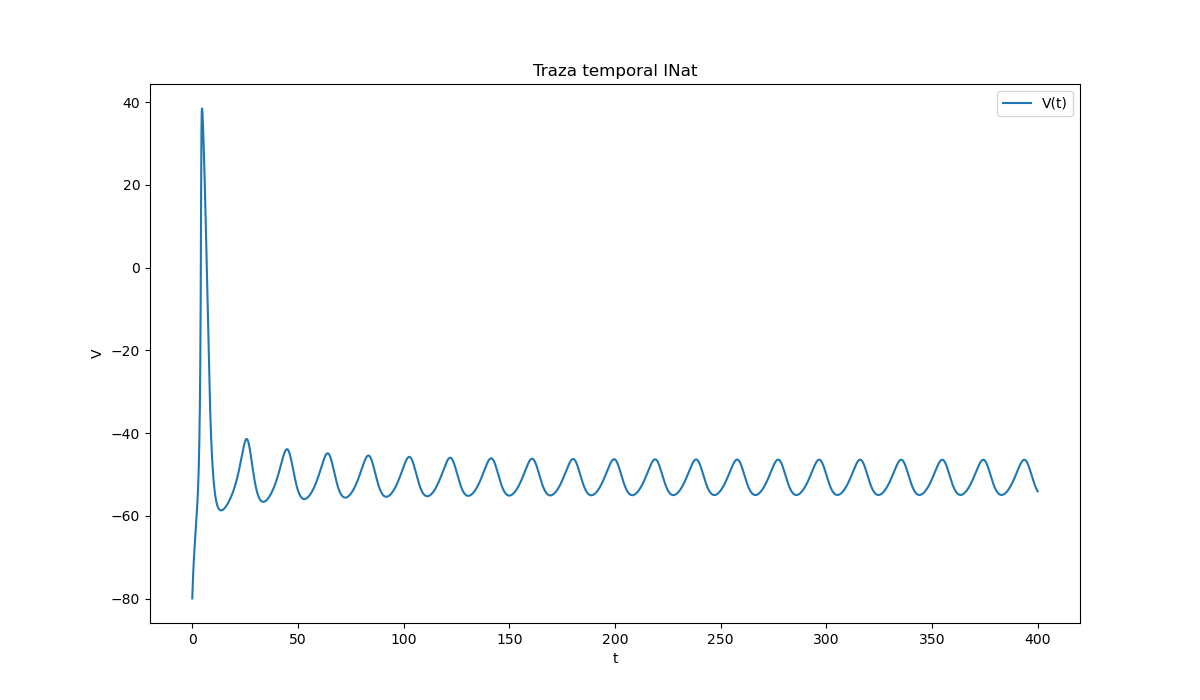

In [5]:
%matplotlib ipympl
I = 7.0 
C = 1.0
gL = 0.9
gNa = 15.0
ENa = 60.0
EL = -70.0

def boltz(V,a,b):
    return 1/(1+exp(-(V-a)/b))

def taug(V,base,amp,Vmax,sig):
    return base+amp*exp(-(Vmax-V)**2/sig**2)

def minf(V):
    return boltz(V,-40,15)

def hinf(V):
    return boltz(V,-62,-7)

def taum(V):
    return taug(V,0.04,0.46,-38.0,30.0)

def tauh(V):
    return taug(V,1.2,7.4,-67.0,20.0)

def INat(V,m,h):
    dV = (I-gL*(V-EL)-gNa*m**3*h*(V-ENa))/(C)
    dm = (minf(V)-m)/taum(V)
    dh = (hinf(V)-h)/tauh(V)
    return [dV,dm,dh]

def INat_int(u,t):
    V, m, h = u
    return INat(V,m,h)

V0 = -80.0
m0 = minf(V0)
h0 = hinf(V0)
u0 = [V0,m0,h0]

t = linspace(0,400,40001)
I_quiver = linspace(0,len(t),15)
U = odeint(INat_int,u0,t)
V = U[:,0]
m = U[:,1]
h = U[:,2]

p = plt.figure(figsize=(12,7))
p = plt.plot(t,V,label='V(t)')
# p = plt.plot(t,m,label='m(t)')
# p = plt.plot(t,h,label='h(t)')
p = plt.title('Traza temporal INat')
p = plt.xlabel('t')
p = plt.ylabel('V')
p =plt.legend()

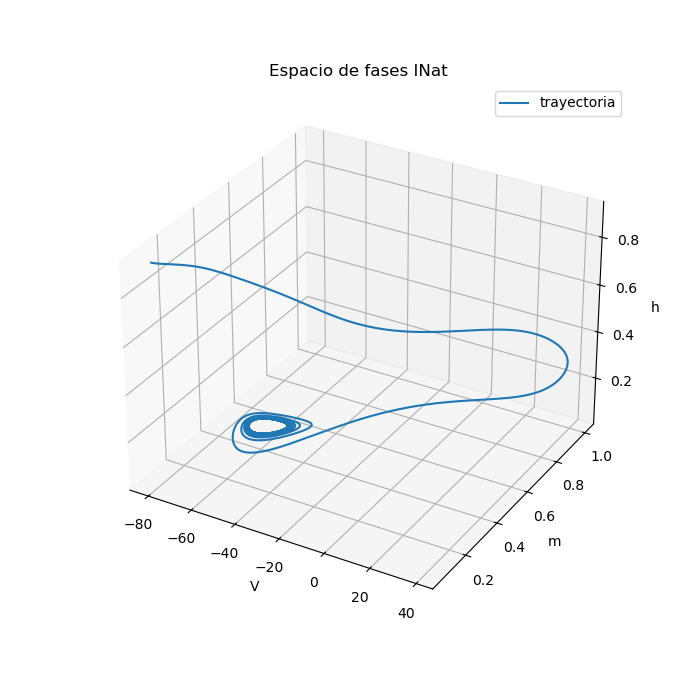

In [6]:
%matplotlib ipympl
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(V, m, h, label='trayectoria')

ax.set_xlabel('V')
ax.set_ylabel('m')
ax.set_zlabel('h')
ax.set_title('Espacio de fases INat')
ax.legend()

[Regresar](#intro)

<a id='reduc'></a>
## Modelo reducido de Hodgkin-Huxley

Antes de pasar al modelo principal, analicemos una breve reducción geométrica que da espigas más similares a las del modelo completo. La regla de evolución del potencial de membrana está dada por

$$C\dot{V}=I_{\rm app}-\overline{g}_{\rm Na}m^3h(V-E_{\rm Na})-\overline{g}_{\rm K}n^4(V-E_{\rm K})-g_{\rm L}(V-E_{\rm L}),$$

donde suponemos, sin ninguna justificación por el momento, que $h=0.89-1.1n$. El sistema es tridimensional y podemos graficar sus trayectorias en el espacio de fases.

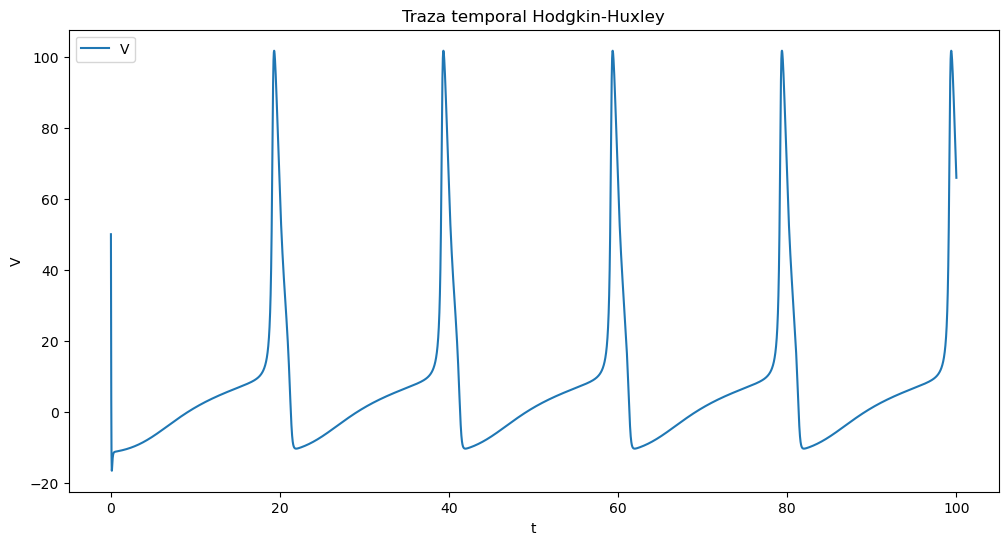

In [2]:
## %matplotlib ipympl

C = 1.0
I = 5.4

EK = -12.0
ENa = 120.0
EL = 10.6

gK = 36.0
gNa = 120.0
gL = 0.3

def am(V):
    return 0.1*(25-V)/(exp((25-V)/10)-1)

def an(V):
    return 0.01*(10-V)/(exp((10-V)/10)-1)

def bm(V):
    return 4.0*exp(-V/18)

def bn(V):
    return 0.125*exp(-V/80)

def minf(V):
    return am(V)/(am(V)+bm(V))

def ninf(V):
    return an(V)/(an(V)+bn(V))

def Vdyn(V,m,h,n):
    return (I-gNa*m**3*h*(V-ENa)-gK*n**4*(V-EK)-gL*(V-EL))/C

def mdyn(V,m):
    return am(V)*(1-m)-bm(V)*m

def hdyn(V,h):
    return ah(V)*(1-h)-bh(V)*h

def ndyn(V,n):
    return an(V)*(1-n)-bn(V)*n

def HHreduc(u,t):
    V, m, n = u
    h = 0.89-1.1*n
    dV = Vdyn(V,m,h,n)
    dm = mdyn(V,m)
    dn = ndyn(V,n)
    return [dV,dm,dn]

V0 = 50.0
m0 = minf(V0)
n0 = ninf(V0)
u0 = [V0,m0,n0]

t = linspace(0,100,10001)

U = odeint(HHreduc,u0,t)
V = U[:,0]
m = U[:,1]
n = U[:,2]

p = plt.figure(figsize = (12,6))
p = plt.plot(t,V,label='V')
p = plt.title('Traza temporal Hodgkin-Huxley')
p = plt.xlabel('t')
p = plt.ylabel('V')
p = plt.legend()

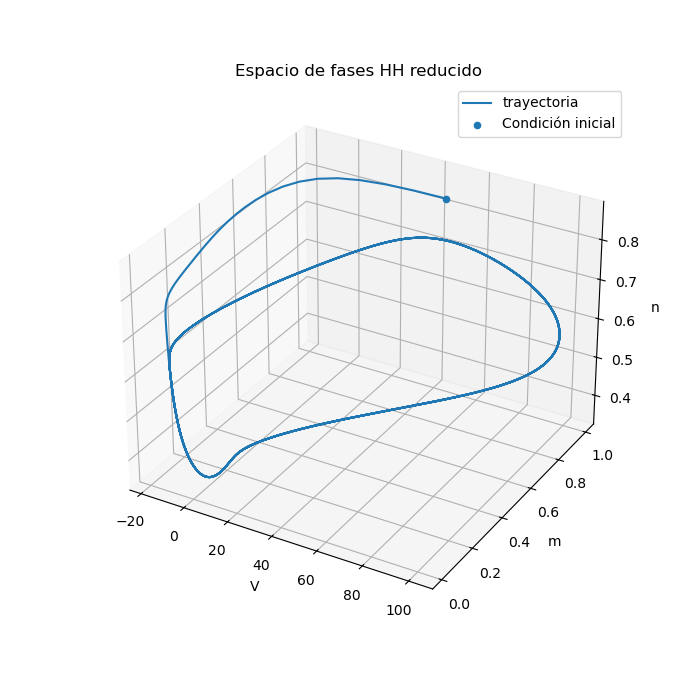

In [3]:
%matplotlib ipympl
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(V, m, n, label='trayectoria')
ax.scatter([V0],[m0],[n0], label='Condición inicial')

ax.set_xlabel('V')
ax.set_ylabel('m')
ax.set_zlabel('n')
ax.set_title('Espacio de fases HH reducido')
ax.legend()

In [4]:
def HHreduc_solve(u):

    return HHreduc(u,1)

sol_seed = [0,0,0]

root = fsolve(HHreduc_solve,sol_seed)
V1, m1, n1 = root
[V1,m1,n1]

[3.5762694325697866, 0.07993608929684066, 0.37360982924796077]

In [5]:
def am(V):
    return 0.1*(25-V)/(exp((25-V)/10)-1)

def an(V):
    return 0.01*(10-V)/(exp((10-V)/10)-1)

def bm(V):
    return 4.0*exp(-V/18)

def bn(V):
    return 0.125*exp(-V/80)

def dam(V):

    return 0.1*(-(exp((25-V)/10)-1)-(25-V)*exp((25-V)/10)*-1/10)/(exp((25-V)/10)-1)**2

def dbm(V):

    return -40/18*exp(-V/18)

def dan(V):

    return 0.01*(-(exp((10-V)/10)-1)-(10-V)*exp((10-V)/10)*-1/10)/(exp((10-V)/10)-1)**2

# def Vdyn(V,m,h,n):
#     return (I-gNa*m**3*(0.89-1.1*n)*(V-ENa)-gK*n**4*(V-EK)-gL*(V-EL))/C

# def mdyn(V,m):
#     return am(V)*(1-m)-bm(V)*m

# def ndyn(V,n):
#     return an(V)*(1-n)-bn(V)*n


def HHreduc_jacob(V,m,n):

    return np.array([[(-gNa*m**3*(0.89-1.1*n)-gK*n**4-gL)/C, (-3*gNa*m**2*(0.89-1.1*n)*(V-ENa))/C, 1.1*gNa*m**3*(V-ENa)-4*gK*n**3*(V-EK)],
                    [dam(V)*(1-m)-dbm(V)*m, -am(V)-bm(V),0],
                    [dan(V)*(1-n)-bn(V)*n, 0, -an(V)-bn(V)]])

In [7]:
J = HHreduc_jacob(V1,m1,n1)
J
# eig(J)[0]

array([[-1.03077708e+00,  1.28289698e+02, -1.24821245e+02],
       [ 1.63091156e-01, -3.56414741e+00,  0.00000000e+00],
       [-4.21890883e-02,  0.00000000e+00, -1.90831759e-01]])

[Regresar](#intro)

<a id='hh'></a>
## El modelo de Hodgkin-Huxley

Ahora hablaremos del modelo que lo empezó todo: el modelo para el axón gigante del calamar propuesto por Hodgkin y Huxley (1952). Se trata de un modelo en cuatro dimensiones dado por las ecuaciones

$$\begin{align*}
C\dot{V}&=I-g_{Na}m^3h(V-E_{Na})-g_Kn^4(V-E_K)-g_L(V-E_L),\\
\dot{m}&=\alpha_m(V)(1-m)-\beta_m(V)m,\\
\dot{h}&=\alpha_h(V)(1-h)-\beta_h(V)h,\\
\dot{n}&=\alpha_n(V)(1-n)-\beta_n(V)n,
\end{align*}$$

donde $I_{Na}$ es una corriente transitoria de sodio con activación $m$ e inactivación $h$, e $I_K$ es una corriente persistente de potasio con activación $n$. Como es de esperar, no podemos hacer una descripción geométrica completa de las trayectorias de este modelo, pero podemos graficar cada variable $V$, $m$, $h$, $n$ como funciones del tiempo. Observemos que la dinámica no se ve de la forma que vimos en los modelos basados en conductancias; aunque Hodgkin y Huxley sí estudian también el papel de las funciones de estado fijo y las constantes de tiempo, la forma en las que estas dinámicas están dadas recuerdan más bien a una transición porbabilística entre un estado abierto y un estado cerrado. Una cuenta sencilla lleva esta forma en la más habitual en nuestro contexto, aunque no se conserva la forma tipo-Boltzmann de ninguna de estas funciones.

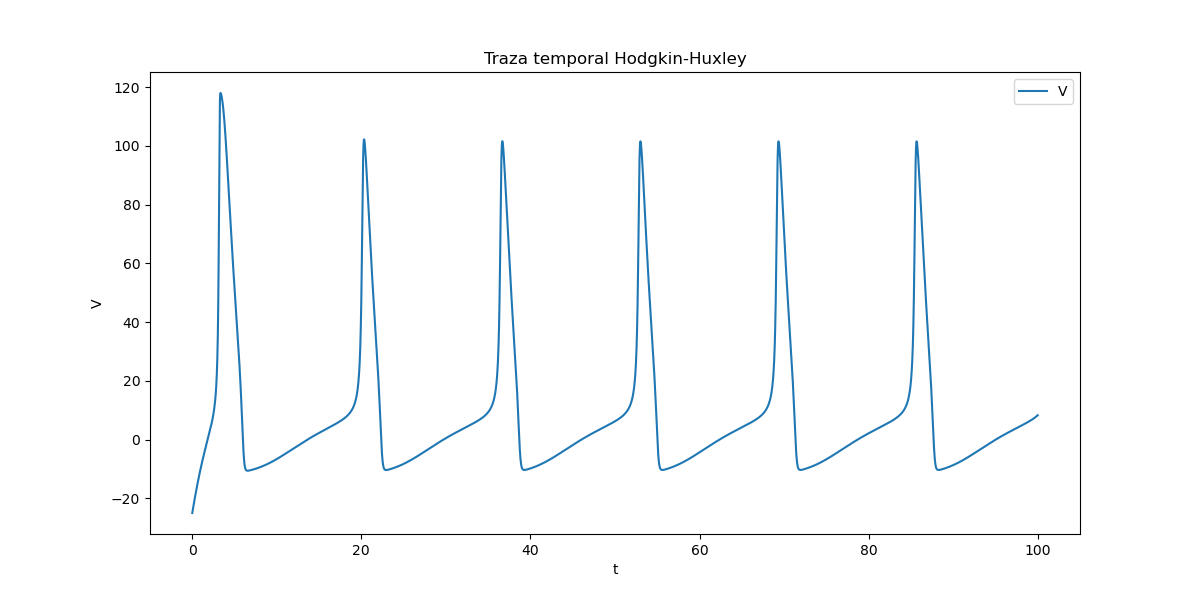

In [23]:
%matplotlib ipympl

C = 1.0
I = 7.0

EK = -12.0
ENa = 120.0
EL = 10.6

gK = 36.0
gNa = 120.0
gL = 0.3

def am(V):
    return 0.1*(25-V)/(exp((25-V)/10)-1)

def ah(V):
    return 0.07*exp(-V/20)

def an(V):
    return 0.01*(10-V)/(exp((10-V)/10)-1)

def bm(V):
    return 4.0*exp(-V/18)

def bh(V):
    return 1/(exp((30-V)/10)+1)

def bn(V):
    return 0.125*exp(-V/80)

def minf(V):
    return am(V)/(am(V)+bm(V))

def hinf(V):
    return ah(V)/(ah(V)+bh(V))

def ninf(V):
    return an(V)/(an(V)+bn(V))

def Vdyn(V,m,h,n):
    return (I-gNa*m**3*h*(V-ENa)-gK*n**4*(V-EK)-gL*(V-EL))/C

def mdyn(V,m):
    return am(V)*(1-m)-bm(V)*m

def hdyn(V,h):
    return ah(V)*(1-h)-bh(V)*h

def ndyn(V,n):
    return an(V)*(1-n)-bn(V)*n

def HH(u,t):
    V, m, h, n = u
    dV = Vdyn(V,m,h,n)
    dm = mdyn(V,m)
    dh = hdyn(V,h)
    dn = ndyn(V,n)
    return [dV,dm,dh,dn]

V0 = -25.0
m0 = minf(V0)
h0 = hinf(V0)
n0 = ninf(V0)
u0 = [V0,m0,h0,n0]

t = linspace(0,100,10001)

U = odeint(HH,u0,t)
V = U[:,0]
m = U[:,1]
h = U[:,2]
n = U[:,3]

p = plt.figure(figsize = (12,6))
p = plt.plot(t,V,label='V')
p = plt.title('Traza temporal Hodgkin-Huxley')
p = plt.xlabel('t')
p = plt.ylabel('V')
p = plt.legend()

Por cierto, podemos graficar las variables $n$ y $h$ para justificar la reducción que estudiamos en el modelo anterior.

In [22]:

p = plt.plot(t,h+1.1*n-0.84)
p = plt.ylim(0,1)

También podemos graficar la evolución de las constantes de tiempo a lo largo de la simulación. De esta manera podemos entender cuál variable es más rápida y cuál es más lenta (si bien esta clasificación no es global, como se observa a continuación).

In [ ]:
p = plt.figure(figsize=(12,7))

def taum(V):

    return 1/(am(V)+bm(V))

def tauh(V):

    return 1/(ah(V)+bh(V))

def taun(V):

    return 1/(an(V)+bn(V))

p = plt.plot(t,taum(V),label='$\tau_m(V)$')
p = plt.plot(t,tauh(V),label='$\tau_h(V)$')
p = plt.plot(t,taun(V),label='$\tau_n(V)$')

p = plt.xlabel('t')
p = plt.ylabel('$\tau$')
p = plt.title('Constantes de tiempo en el modelo HH')
p = plt.legend()

[Regresar](#intro)

<a id='plant'></a>
## Modelo de generación de ráfagas

Ahora estudiaremos brevemente el modelo de Plant & Kim (1976). Este modelo basado en conductancias sigue la dinámica

$$C\dot{V}=(g_Ix_I^3y_I+g_T)(V_I-V)+(g_Kx_K^4+g_Ax_Ay_A+g_Px_P)(V_K-V)+g_L(V_L-V)+I_{ep}+I_{ext},$$

donde $I_I=g_Ix_I^3y_I(V-V_I)$ es una corriente entrante sensible a TTX, $I_T=g_T(V-V_I)$ es una corriente resistente a TTX, $I_K=g_Kx_K^4(V-V_K)$ es una corriente persistente de potasio, $I_A=g_Ax_Ay_A(V-V_K)$es una corriente transitoria de potasio, e $I_P=g_Px_P(V-V_K)$ es una corriente persistente y lenta, conocida como la corriente marcapasos, que corresponde a lo que hoy en día llamaríamos una corriente de *potasio dependiente de calcio*. 

In [24]:
C = 1.0

# gI = 4.0
gI = 0.0

gK = 0.3
gL = 0.003
gT = 0.008
gA = 0.06
gP = 0.015

VI = 30.0
VK = -75.0
VL = -40.0

tauXA = 10.0
tauYA = 235.0
tauXP = 8000.0

Iep = -0.22

Iext = 0.0
# Iext = 0.22
# Iext = -0.14

def am(V):

    return 0.1*(-26.0-1.2*V)/(exp((26-V)/10)-1)

def bm (V):

    return 4*exp((51-1.2*V)/18)

def ah(V):

    return 0.07*exp(-51-1.21*V)/20

def bh(V):

    return 1/(exp((21-1.3*V)/10)+1)

def an(V):

    return 0.01*(-21-1.21*V)/(exp((-21-1.21*V)/10)-1)

def bn(V):

    return 0.125*exp((-31-V)/80)

def SI(V):

    return am(V)/(am(V)+bm(V))

def ZI(V):

    return ah(V)/(ah(V)+bm(V))

def SK(V):

    return an(V)/(an(V)+bn(V))

def tauXI(V):

    return 12.5/(am(V)+bm(V))

def tauYI(V):

    return 12.5/(ah(V)+bh(V))

def tauXK(V):

    return 12.5/(an(V)+bn(V))

def SA(V):

    return 1/(1+exp(-0.08*(V+45)))

def ZA(V):

    return 1/(1+exp(0.27*(V+50)))

def SP(V):

    return 1/(1+exp(-0.7*(V+47)))

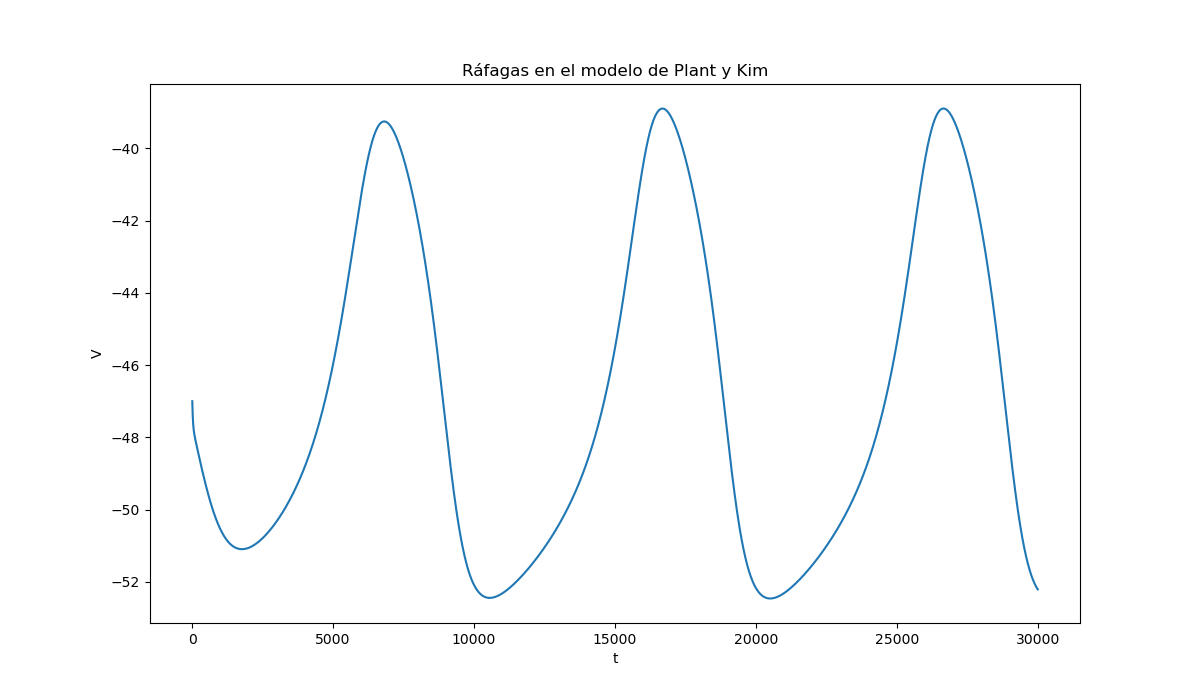

In [25]:
def burst(u,t):

    V, xI, yI, xK, xA, yA, xP = u

    dV = 1/C*((gI*xI**3*yI+gT)*(VI-V)+(gK*xK**4+gA*xA*yA+gP*xP)*(VK-V)+gL*(VL-V)+Iep+Iext)
    dxI = 1/tauXI(V)*(SI(V)-xI)
    dyI = 1/tauYI(V)*(ZI(V)-yI)
    dxK = 1/tauXK(V)*(SK(V)-xK)
    dxA = 1/tauXA*(SA(V)-xA)
    dyA = 1/tauYA*(ZA(V)-yA)
    dxP = 1/tauXP*(SP(V)-xP)

    return [dV, dxI, dyI, dxK, dxA, dyA, dxP]

t = linspace(0,30000,3000001)

V0 = -47.0
xI0 = SI(V0)
yI0 = ZI(V0)
xK0 = SK(V0)
xA0 = SA(V0)
yA0 = ZA(V0)
xP0 = SP(V0)

u0 = [V0, xI0, yI0, xK0, xA0, yA0, xP0]
U = odeint(burst, u0, t)
V = U[:,0]

p = plt.figure(figsize = (12,7))
p = plt.plot(t,V)
p = plt.xlabel('t')
p = plt.ylabel('V')
p = plt.title('Ráfagas en el modelo de Plant y Kim')

[Regresar](#intro)